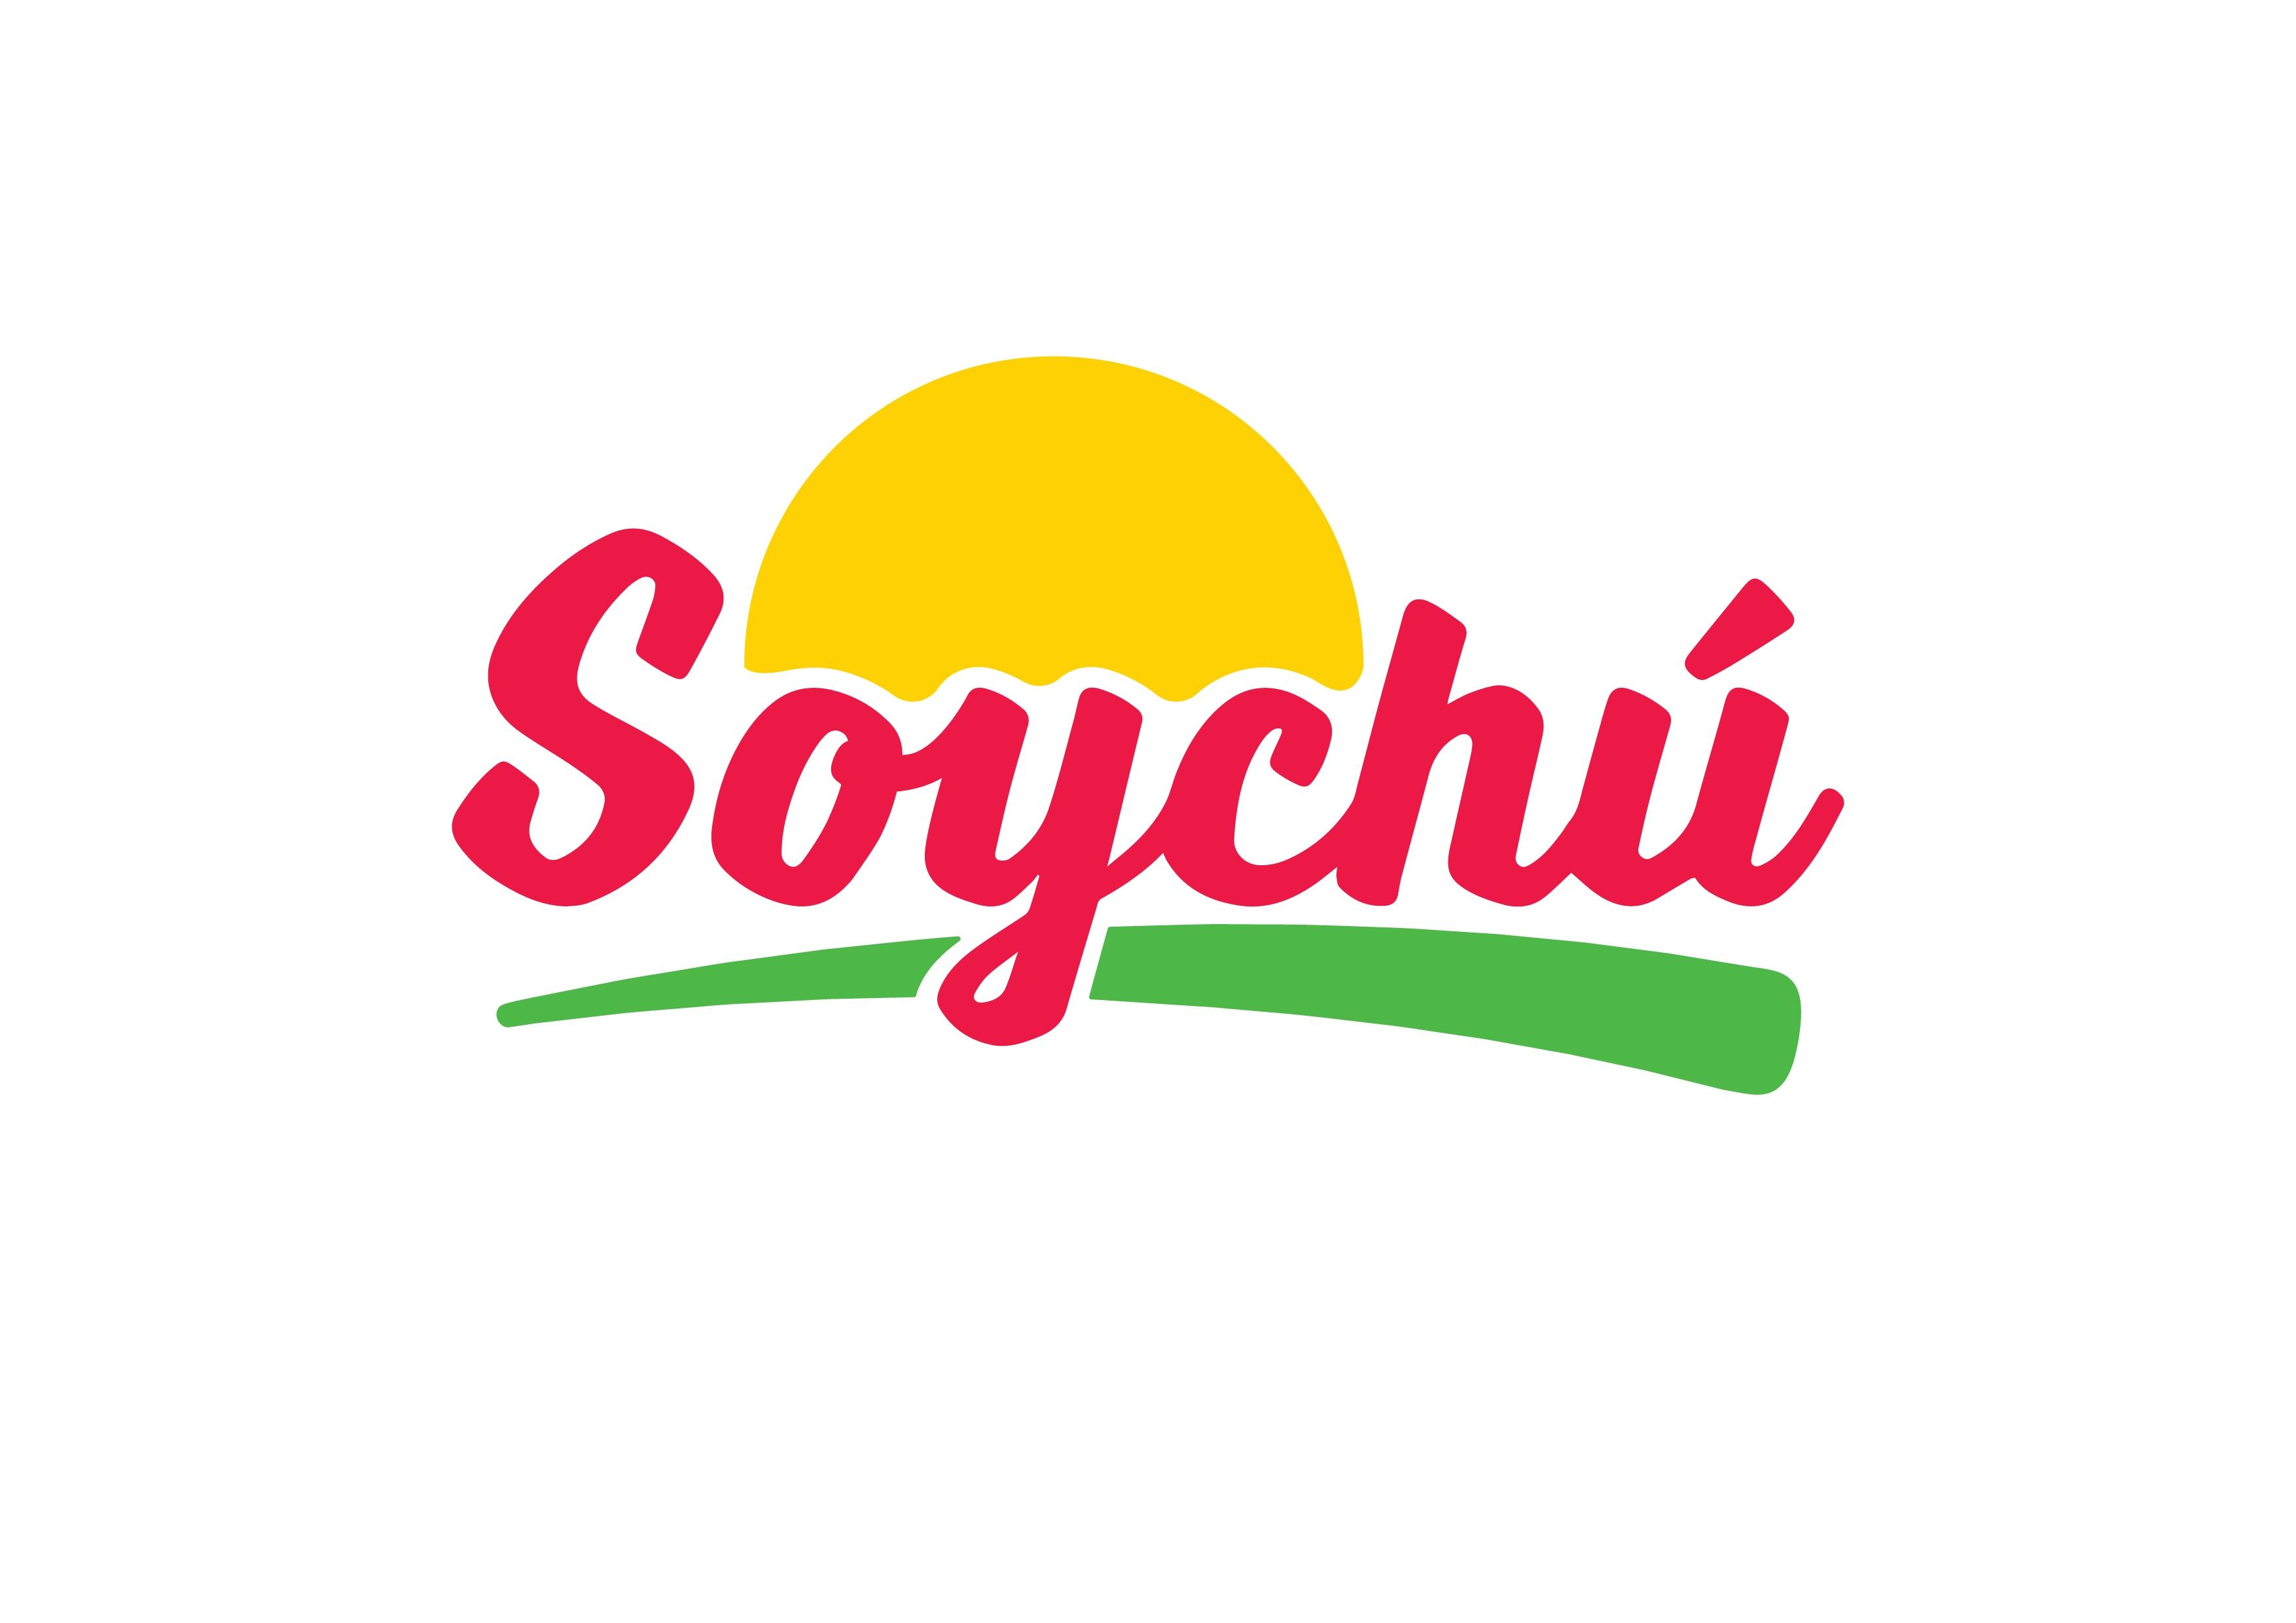


**Definición de objetivo**
El objetivo del presente trabajo es detectar el impacto de los factores que afectan al crecimiento de los pollos parrilleros para tomar decisiones que mejoren los resultados productivos. 
**Contexto comercial**
El retorno económico de la empresa productora de pollos parrilleros depende de la obtención de mejores resultados productivos. A mayor ganancia de peso diaria, por ejemplo, el consumo total de alimento será menor disminuyendo el costo. Otro impacto positivo del aumento de la ganancia de peso diaria es que se reduce la edad a faena de los animales ya que se alcanza el peso deseado en menor cantidad de días. Esta reducción de días permite: liberación de superficie de producción (metros cuadrados de galpón, rotación), menor propensión a sufrir enfermedades y accidentes (por ejemplo cortes de luz). También el dueño de la granja tiene menores costos de luz y gas y por lo tanto mayores ganancias finales también.
**Problema comercial**
La empresa plantea los siguientes interrogantes: ¿Por qué la ganancia de peso no es similar en todas las granjas? ¿Por qué tampoco es uniforme a lo largo del año? ¿Es posible predecir el crecimiento en el futuro? ¿El alimento es el adecuado? ¿Qué tiene mayor impacto, el alimento o las condiciones del ambiente? ¿Es posible mejorar los valores de ganancia de peso manteniendo iguales las condiciones de genética, nutrición y ambiente (en el sentido estricto de la localización geográfica de las granjas)
**Contexto analítico**
La empresa ha provisto un archivo excel con información de resultados, más adelante agregará otros archivos excel con información de la nutrición, de la genética, de los crecimientos semanales y del clima.
**Exploración de datos**
Se realizarán gráficos para explorar los datos provistos.


*La producción de pollos parrilleros en Argentina se encuentra concentrada en unas pocas empresas y la mayoría de ellas son de tipo familiar. Las más grandes realizan toda la cadena de producción: desde las cabañas de la genética (Abuelos) hasta la distribución en los puntos finales del producto terminado: cadenas de supermercados, minoristas, consumidor directo y puertos (productos de exportación).Los pollos parrilleros se crían en granjas conformadas por galpones en los que se ingresan los animales recién nacidos (pollitos BB), las empresas productoras proveen todos los insumos necesarios para la crianza (alimento, medicamentos, desinfectantes, material de cama, servicios de limpieza, entre otros) y el encargado o dueño de la granja (integrado) se ocupa del manejo de las aves y su ambiente (provisión de agua, alimento, condiciones de temperatura y humedad, etc.). La duración del ciclo de crianza es de aproximadamente 48 días y el peso final de alrededor de 2.8 Kilos. La empresa productora retira los animales para llevarlos al frigorífico. 
La producción se analiza en función de la eficiencia productiva de cada crianza. Una mayor eficiencia significa lograr un animal de mayor peso con el menor consumo de alimento posible ya que el alimento constituye aproximadamente el 70% del costo de producción. La relación alimento consumido/peso final logrado es la conversión alimenticia. El impacto de la mortalidad es negativo y es creciente con la edad: a mayor edad, más cantidad de alimento habrá consumido sin producir kilos.
La edad a faena está condicionada por la demanda del sector de ventas: tamaño de las aves, cantidad de kilos; por el ritmo de crecimiento (ganancia media diaria de peso) y por las condiciones sanitarias (enfermedades).
El valor de conversión como indicador productivo tiene la limitación de que no puede ser utilizado para comparar resultados entre granjas y períodos de tiempo por depender de la edad, el peso final y la mortalidad.
Debido a ello se utilizan otros parámetros como la ganancia media diaria de peso (A.D.), la conversión ajustada a un peso teórico (Conversión aj. a 2.7 kg) y la relación Peso/Conversión.*

El resultado productivo será la resultante de la interacción de los siguientes factores:
•La genética: La línea genética de las aves, el origen y edad de los reproductores (padres), el tipo de huevo que dio origen a los pollitos BB.
•La nutrición: La composición de la dieta, la calidad de las materias primas utilizadas.
•El ambiente: El tipo de galpón de crianza (convencional, ambiente controlado), las condiciones de temperatura y humedad y la disponibilidad de recursos: comederos, bebederos, ventiladores, etc.
•La sanidad: Planes de vacunación y salud intestinal, medicaciones, lavado y desinfección, aplicación de medidas de bioseguridad, etc.
El planteo del presente trabajo es analizar la ganancia media diaria de peso para intentar estimar la proporción del impacto de los mencionados factores en la falta de crecimiento de los animales respecto de los valores esperados indicados por el estándar de la línea genética.



**Motivación y audiencia**: La motivación del presente trabajo es hallar relaciones entre los datos provistos para mejorar los resultados provistos por la empresa, esta dirigido a los directivos de la empresa y los mandos superiores encargados de ejecutar las acciones de cada área productiva.

**Preguntas hipótesis**: Las hipótesis preliminar es que es posible detectar el impacto de las distintas variables en el resultado productivo para así tomar medidas diferenciales.


**Visualización de datos productivos de una empresa de producción avícola: Sector integración (granjas de engorde de pollos parrilleros) Años 2015-2023**

In [1]:
import pandas as pd
import xlsxwriter
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import numpy as np
import datetime
import pingouin as pg
import statsmodels.api as sm
from scipy import stats


In [2]:
pip install -U scikit-learn

In [3]:
#Ingresos semanales compilado registra resultados finales de la producción en la pestaña BASE. Contiene además datos de genética, nutrición y sanidad.
df = pd.read_excel(r"C:\Users\ebover\OneDrive - FRIGORIFICO DE AVES SOYCHU S.A.I.C.F.I.A\ingresos semanales compilado.xlsx",sheet_name='BASE', skiprows=1 , usecols=range(1,67))

In [4]:
df.drop(df[(df['A.D.'] >100)].index, inplace=True) #Elimino valores erróneos

In [5]:
df.drop(df[(df['Edad'] >70)].index, inplace=True) #Elimino edades fuera de estándar

In [6]:
df.head()

,granja,Nombre,Primer BB,Cantid. BB,A Faena,% a 7 Días,% Mortan.,% Fal.,Kg. Pollo,P. Prom.,...,Índice,nd,zona climática,Cuartil EFS 2021,conv aj aviagen 2021,conv aj AVIAGEN,hepatitis,consumo total,"Pes conv 2,7",zona prod
0,2544,"""GRANJA DON MIGUEL""",2014-11-13,36000,34964,0.55,2.88,-0.33,93360,2.670175,...,6,NaN,Arrecifes,NaN,2.133946,2.134802,NaN,5.682216,1.262878,BA
1,2558,LA MAMA,2014-11-07,57500,54217,0.83,5.71,-0.26,145260,2.679233,...,7,NaN,Arrecifes,NaN,2.315835,2.316431,NaN,6.193629,1.164476,BA
2,2761,LOS CHOCHOS,2014-11-13,39000,36483,0.92,6.45,-0.48,100360,2.750870,...,8,NaN,25 de mayo,NaN,2.266716,2.265256,NaN,6.263191,1.194771,BA
3,2524,GRANJA DIAMANTE,2014-11-14,30000,28231,1.35,5.90,1.07,77514,2.745705,...,15,NaN,Arrecifes,NaN,2.263520,2.262208,NaN,6.239843,1.196094,BA
4,2741,KBB ARRECIFES SA,2014-11-14,42000,38912,0.76,7.35,0.19,120920,3.107525,...,21,NaN,Arrecifes,NaN,2.189003,2.177307,NaN,7.053505,1.265246,BA


In [7]:
columns_names = df.columns.values
columns_names
# Los resultados se agrupan por crianza (índice) de cada granja (integrado) y se registran los diferentes resultados e indicadores de la producción#

array(['granja', 'Nombre', 'Primer BB', 'Cantid. BB', 'A Faena',
       '% a 7 Días', '% Mortan.', '% Fal.', 'Kg. Pollo', 'P. Prom.',
       'Kg. Alim.', 'Conv', 'Ulto. Levan.', 'Edad', 'A.D.', 'E.F.S.',
       'Gas', '$ x Ave Ter.', 'Gas x Ave In.', 'Bonificación',
       'Total Liqu.', 'Total Liq. con Bioseguridad',
       '$ AVE FINAL POR SISTEMA', 'año ingreso', 'mes ingreso',
       'semana ingreso', 'año levante', 'mes levante', 'semana levante',
       'sexo', 'zona', 'Tipo de granja', 'Estación del año',
       'Días de receso', 'Días de receso corregido',
       'Fuera de rango por receso', 'fuera de rango por mortandad',
       'mortandad semanal promedio', 'Conversión ajustada a 2,7 kg',
       'Consumo medio diario (g)', 'Consumo ajustado a 2,7 kg', 'Destino',
       'capacidad', 'Densidad', 'kg pollo/m2', 'aves/comedero',
       'Cuartil por crianza 2017', 'Ventilación forzada',
       'Ambiente controlado', 'Distancia a planta alimento', 'localidad',
       'experim', 'da

In [8]:
df.shape

(15316, 66)

**Ganancia media diaria de peso**

<AxesSubplot:xlabel='A.D.', ylabel='Count'>

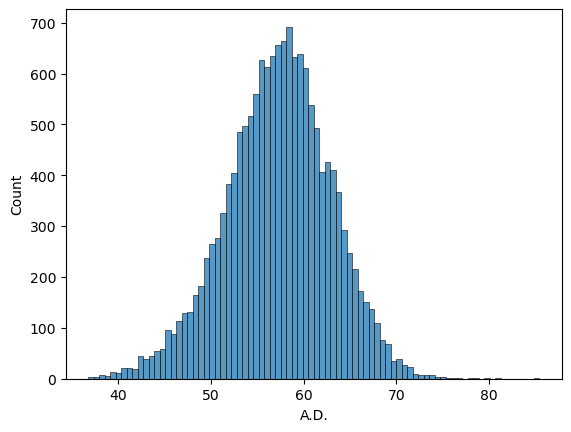

In [96]:
#Ganancia media diaria de peso#
sns.histplot(data=df, x='A.D.')

*Los valores de ganancia media diaria de peso tienen una distribución normal y se ubican en un rango entre 35 y 75 gramos/día, los valores más frecuentes están alrededor de los 58 gr/día.*

In [9]:
# Ganancia de peso a lo largo del tiempo#
gcia=df[['Ulto. Levan.','A.D.']]
gcia.head()

,Ulto. Levan.,A.D.
0,2015-01-01,54.49
1,2015-01-01,50.63
2,2015-01-01,56.12
3,2015-01-02,56.12
4,2015-01-04,60.98


In [10]:
gcia=gcia.groupby(['Ulto. Levan.']).mean()
gcia

,A.D.
Ulto. Levan.,
2015-01-01,55.485000
2015-01-02,53.344286
2015-01-04,57.371429
2015-01-05,52.416000
2015-01-06,51.292000
...,...
2023-02-23,61.182500
2023-02-24,58.840000
2023-02-26,57.283846


<AxesSubplot:xlabel='Ulto. Levan.', ylabel='A.D.'>

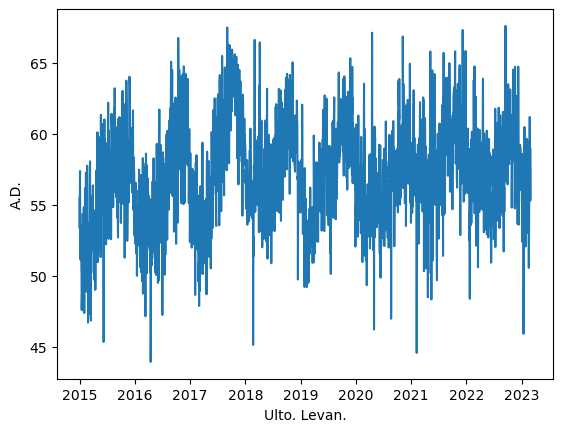

In [11]:
sns.lineplot(data=gcia, x='Ulto. Levan.', y='A.D.')

*La ganancia de peso muestra una aparente estacionalidad de los resultados todos los años*

In [12]:
gciames=gcia.resample('M').mean()

<AxesSubplot:xlabel='Ulto. Levan.', ylabel='A.D.'>

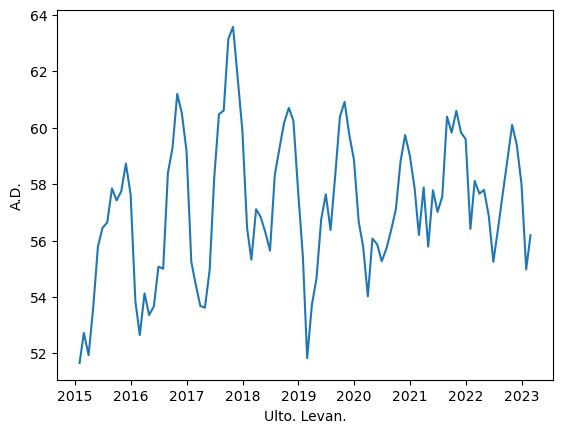

In [13]:
sns.lineplot(data=gciames, x='Ulto. Levan.', y='A.D.')

In [14]:
gciames2=df[['mes levante','A.D.']]
gciames2.head()

,mes levante,A.D.
0,1,54.49
1,1,50.63
2,1,56.12
3,1,56.12
4,1,60.98


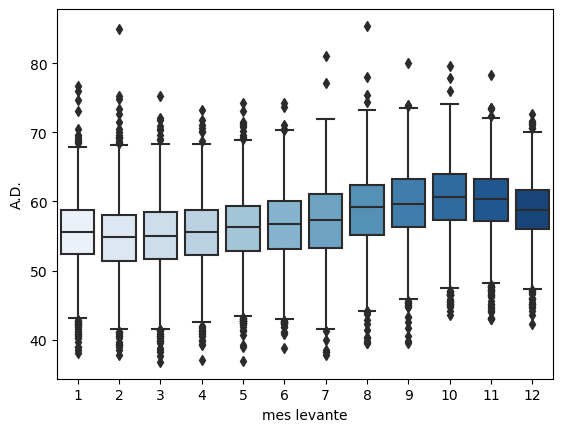

In [15]:
sns.boxplot( x=gciames2['mes levante'], y=gciames2['A.D.'], palette="Blues");
plt.show()

*Los mejores resultados se encuentran entre los meses septiembre a noviembre. Mes levante significa el mes en que los animales fueron retirados de la granja, es la fecha del final de crianza.Los peores resultados se dan en los meses de febrero a mayo.Los valores outliers se encuentran en todos los meses.*

In [16]:
gcia_año=df[['año levante','A.D.']]
gcia_año.head()

,año levante,A.D.
0,2015,54.49
1,2015,50.63
2,2015,56.12
3,2015,56.12
4,2015,60.98


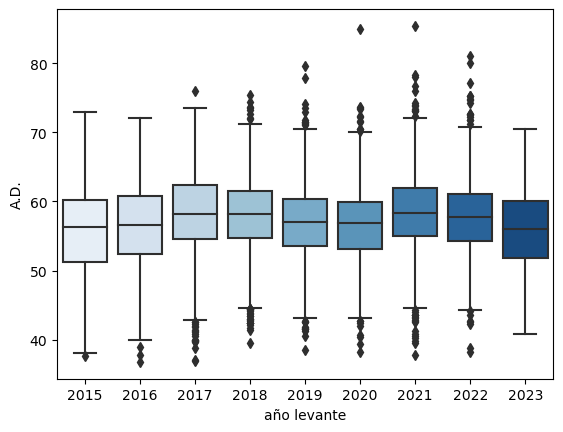

In [17]:
sns.boxplot( x=gcia_año['año levante'], y=gcia_año['A.D.'], palette="Blues");
plt.show()

*Comparando entre años, la cantidad de outliers se incrementa a partir del 2018. Los años 2017,2018 y 2021 podría asumirse que fueron los mejores años de ganancia de peso.El año 2023 solo tiene datos hasta la segunda quincena de marzo por lo que no puede usarse en la comparación.*

In [18]:
#zona de producción#
gcia_zona=df[['zona prod','A.D.']]
gcia_zona.head()

,zona prod,A.D.
0,BA,54.49
1,BA,50.63
2,BA,56.12
3,BA,56.12
4,BA,60.98


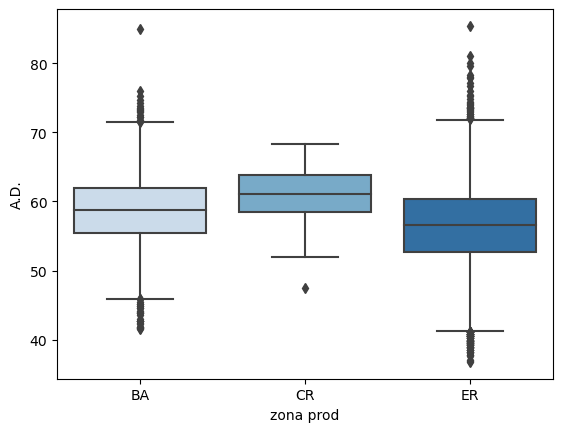

In [19]:
sns.boxplot( x=gcia_zona['zona prod'], y=gcia_zona['A.D.'], palette="Blues");
plt.show()

La zona CR tiene mejores resultados productivos. La cantidad de valores de esta zona es mucho menor y los datos corresponden solo al período mayo 22 - marzo 23. Comparando BA con ER, en BA las ganancia son mayores y la dispersión de los valores es menor.

In [20]:
#localidades por zona#
df_BA=df[df['zona prod'] == 'BA']
df_BA.head()

,granja,Nombre,Primer BB,Cantid. BB,A Faena,% a 7 Días,% Mortan.,% Fal.,Kg. Pollo,P. Prom.,...,Índice,nd,zona climática,Cuartil EFS 2021,conv aj aviagen 2021,conv aj AVIAGEN,hepatitis,consumo total,"Pes conv 2,7",zona prod
0,2544,"""GRANJA DON MIGUEL""",2014-11-13,36000,34964,0.55,2.88,-0.33,93360,2.670175,...,6,NaN,Arrecifes,NaN,2.133946,2.134802,NaN,5.682216,1.262878,BA
1,2558,LA MAMA,2014-11-07,57500,54217,0.83,5.71,-0.26,145260,2.679233,...,7,NaN,Arrecifes,NaN,2.315835,2.316431,NaN,6.193629,1.164476,BA
2,2761,LOS CHOCHOS,2014-11-13,39000,36483,0.92,6.45,-0.48,100360,2.750870,...,8,NaN,25 de mayo,NaN,2.266716,2.265256,NaN,6.263191,1.194771,BA
3,2524,GRANJA DIAMANTE,2014-11-14,30000,28231,1.35,5.90,1.07,77514,2.745705,...,15,NaN,Arrecifes,NaN,2.263520,2.262208,NaN,6.239843,1.196094,BA
4,2741,KBB ARRECIFES SA,2014-11-14,42000,38912,0.76,7.35,0.19,120920,3.107525,...,21,NaN,Arrecifes,NaN,2.189003,2.177307,NaN,7.053505,1.265246,BA


In [21]:
local_BA= df_BA[['localidad','Índice','A.D.']]
local_BA.head()

,localidad,Índice,A.D.
0,San Pedro,6,54.49
1,Salto,7,50.63
2,Chivilcoy,8,56.12
3,San Pedro,15,56.12
4,Arrecifes,21,60.98


In [28]:
local_BA2=local_BA.groupby(['localidad']).size().reset_index(name='cant_crianzas')
local_BA2 = local_BA2.sort_values('cant_crianzas',ascending=False)
local_BA2

,localidad,cant_crianzas
16,San Pedro,826
12,Norberto de la Riestra,631
0,Arrecifes,583
14,Salto,573
13,Roque Pérez,437
5,Chivilcoy,421
2,Capitán Sarmiento,318
6,Colón BA,307
17,Santa Lucía,291
3,Carmen de Areco,222


In [29]:
local_BA3 =local_BA2.loc[local_BA2['cant_crianzas'] >= 100]
local_BA3

,localidad,cant_crianzas
16,San Pedro,826
12,Norberto de la Riestra,631
0,Arrecifes,583
14,Salto,573
13,Roque Pérez,437
5,Chivilcoy,421
2,Capitán Sarmiento,318
6,Colón BA,307
17,Santa Lucía,291
3,Carmen de Areco,222


<AxesSubplot:xlabel='localidad', ylabel='cant_crianzas'>

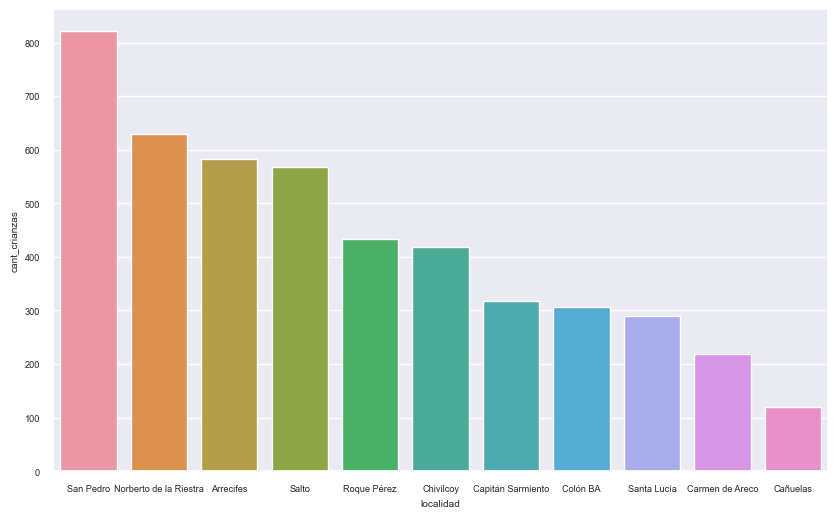

In [114]:
plt.figure(figsize=(10,6))
sns.set(font_scale = 0.6)
sns.barplot(y='cant_crianzas',x='localidad',data=local_BA3)


In [ ]:
#para seleccionar solo las regiones que tienen mayor cantidad de datos de crianzas# 
#lo que quería era ver el promedio de las ganancias de las localidades con mayor nro de crianzas, no supe como hacerlo

In [30]:
gcia_BA=df_BA[['localidad','A.D.']] 
gcia_BA.head()

,localidad,A.D.
0,San Pedro,54.49
1,Salto,50.63
2,Chivilcoy,56.12
3,San Pedro,56.12
4,Arrecifes,60.98


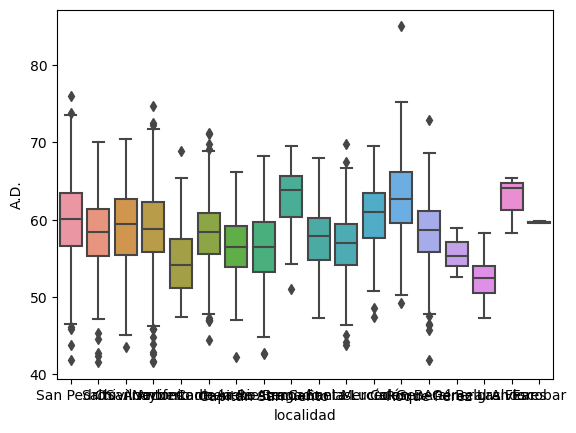

In [31]:
sns.boxplot( x=gcia_BA['localidad'], y=gcia_BA['A.D.']);
plt.show()

In [ ]:
# Las ganancias de peso son diferentes según la localidad geográfica en la que se encuentre la granja.#

In [32]:
gcia_BA2=df_BA[['granja','localidad','A.D.']] 
gcia_BA2.head()

,granja,localidad,A.D.
0,2544,San Pedro,54.49
1,2558,Salto,50.63
2,2761,Chivilcoy,56.12
3,2524,San Pedro,56.12
4,2741,Arrecifes,60.98


In [33]:
gcia_BA2=gcia_BA2.groupby(['granja','localidad']).mean()
gcia_BA2

,,A.D.
granja,localidad,
2501,Santa Lucía,58.077381
2503,San Pedro,59.728537
2513,Arrecifes,57.142500
2515,Capitán Sarmiento,56.599091
2521,San Pedro,61.030227
...,...,...
2960,Roque Pérez,61.600000
2961,Roque Pérez,41.840000
2962,Capitán Sarmiento,52.910000


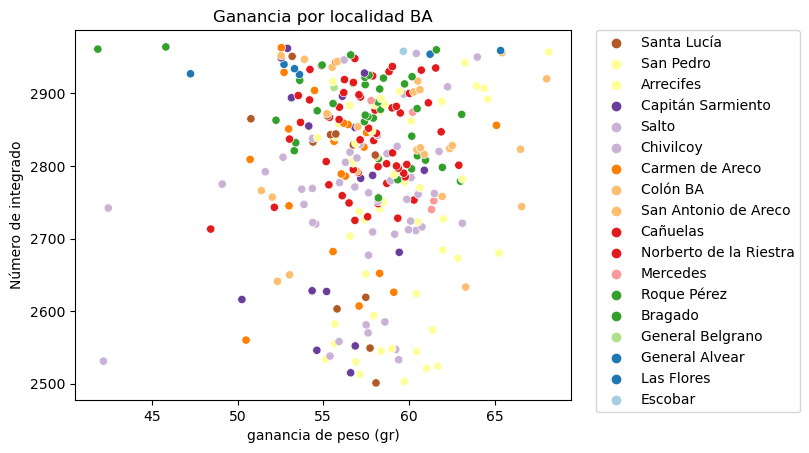

In [44]:
sns.scatterplot(
    data=gcia_BA2, 
    x='A.D.',
    y='granja', 
    hue='localidad',
   
    palette='Paired_r'
    )

plt.title('Ganancia por localidad BA')
plt.xlabel('ganancia de peso (gr)')
plt.ylabel('Número de integrado')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

*En principio no habría un patrón de resultados asociado a la localidad*

In [35]:
#localidades por zona#
df_ER=df[df['zona prod'] == 'ER']
df_ER.head()

,granja,Nombre,Primer BB,Cantid. BB,A Faena,% a 7 Días,% Mortan.,% Fal.,Kg. Pollo,P. Prom.,...,Índice,nd,zona climática,Cuartil EFS 2021,conv aj aviagen 2021,conv aj AVIAGEN,hepatitis,consumo total,"Pes conv 2,7",zona prod
5080,357,MENESCARDI FABRICIO MEDARDO,2014-11-11,23200,20699,1.42,10.78,-1.09,58340,2.818494,...,1,NaN,Arrecifes,NaN,2.194775,2.191374,NaN,6.252186,1.239229,ER
5081,605,COSSO CARLOS,2014-11-11,23176,20678,1.51,10.78,-1.88,61580,2.978044,...,2,NaN,otra ER,NaN,2.213669,2.205689,NaN,6.756601,1.240738,ER
5082,833,CARDINAUX MARTIN ULISES,2014-11-14,40000,36825,1.45,7.94,-2.86,102480,2.782892,...,3,NaN,otra ER,NaN,2.006952,2.004573,NaN,5.630876,1.352869,ER
5083,1710,STEGEMANN DANIELA CRISTINA,2014-11-11,29000,26423,1.10,8.89,0.25,74800,2.830867,...,4,NaN,otra ER,NaN,2.191255,2.187499,NaN,6.276615,1.242188,ER
5084,2333,OJEDA LIVIO,2014-11-13,22000,19502,0.92,11.35,-1.91,53020,2.718696,...,5,NaN,otra ER,NaN,2.139559,2.139023,NaN,5.826890,1.263433,ER


In [36]:
local_ER= df_ER[['localidad','Índice']]
local_ER.head()

,localidad,Índice
5080,Aldea Asunción,1
5081,Gualeguay,2
5082,Larroque,3
5083,Rocamora,4
5084,Villaguay,5


In [37]:
local_ER2=local_ER.groupby(['localidad']).size().reset_index(name='cant_crianzas')
local_ER2 = local_ER2.sort_values('cant_crianzas',ascending=False)
local_ER2

,localidad,cant_crianzas
14,Mansilla,1208
7,Galarza,897
3,Carbó,873
0,Aldea San Antonio,844
18,Santa Anita,779
8,Gualeguay,760
21,Villaguay,706
1,Aldea Asunción,609
10,Herrera,521
16,Rocamora,451


In [38]:
gcia_ER=df_ER[['localidad','A.D.']] 
gcia_ER.head()

,localidad,A.D.
5080,Aldea Asunción,55.29
5081,Gualeguay,58.43
5082,Larroque,57.92
5083,Rocamora,55.49
5084,Villaguay,55.51


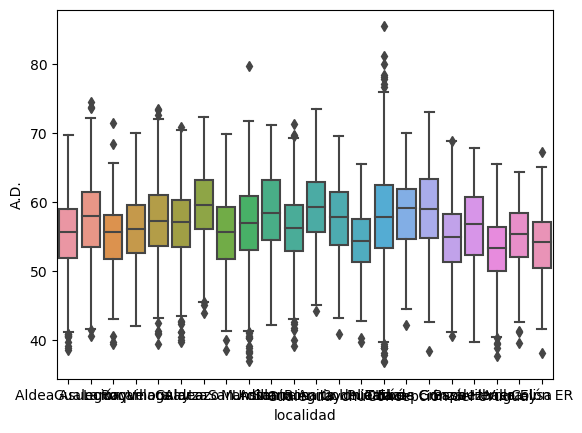

In [39]:
sns.boxplot( x=gcia_ER['localidad'], y=gcia_ER['A.D.']);
plt.show()

*Las ganancias de peso son diferentes según la localidad geográfica en la que se encuentre la granja.*

In [40]:
gcia_ER2=df_ER[['granja','localidad','A.D.']] 
gcia_ER2.head()

,granja,localidad,A.D.
5080,357,Aldea Asunción,55.29
5081,605,Gualeguay,58.43
5082,833,Larroque,57.92
5083,1710,Rocamora,55.49
5084,2333,Villaguay,55.51


In [41]:
gcia_ER2=gcia_ER2.groupby(['granja','localidad']).mean()
gcia_ER2

,,A.D.
granja,localidad,
10,Herrera,55.041905
12,Colón ER,55.423889
13,Villa Elisa,53.694000
14,Herrera,51.895000
15,Villa Elisa,52.104737
...,...,...
2341,Villaguay,57.302558
2342,Villaguay,58.807368
2343,Villaguay,61.321818


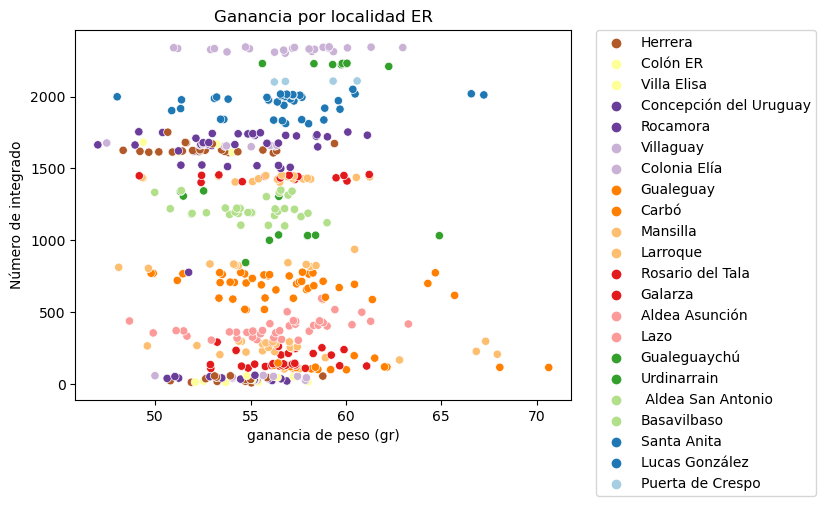

In [45]:
sns.scatterplot(
    data=gcia_ER2, 
    x='A.D.',
    y='granja', 
    hue='localidad',
   
    palette='Paired_r'
    )

plt.title('Ganancia por localidad ER')
plt.xlabel('ganancia de peso (gr)')
plt.ylabel('Número de integrado')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

*en principio no habría un patrón de resultados asociado a la localidad*

In [46]:
#Tipo de granja#
tipo_granja=df[['Ventilación forzada','A.D.']] 
tipo_granja.head()

,Ventilación forzada,A.D.
0,S,54.49
1,N,50.63
2,N,56.12
3,N,56.12
4,N,60.98


In [47]:
tipo_granja2=tipo_granja.groupby(['Ventilación forzada']).mean()
tipo_granja2

,A.D.
Ventilación forzada,
MI,58.951039
N,56.788546
S,60.158025


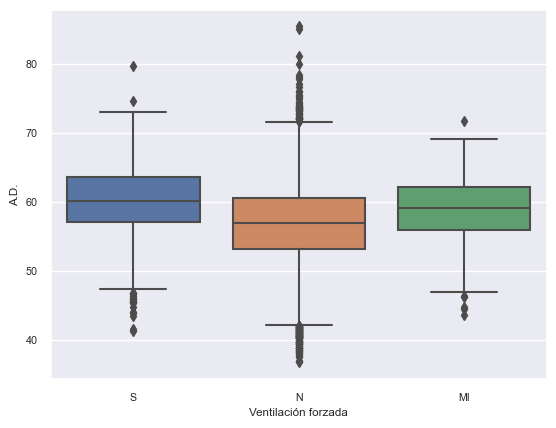

In [48]:
sns.set(font_scale = 0.7)
sns.boxplot( x=tipo_granja['Ventilación forzada'], y=tipo_granja['A.D.']);
plt.show()

*La S significa que la granja tiene un sistema de ventilación forzada, la N que no lo tiene y MI que algunos galpones de la granja tienen y otros no. Las granjas de ventilación forzada tienen mayores ganancias de peso y menor dispersión de los resultados, sin embargo hay granjas convencionales que pueden alcanzar y superar los valores de ganancia.*


In [49]:
#consumo de alimento#
consumo=df[['Consumo medio diario (g)','A.D.','Índice']] 
consumo.head()


,Consumo medio diario (g),A.D.,Índice
0,115.963592,54.49,6
1,117.081839,50.63,7
2,127.820226,56.12,8
3,127.343729,56.12,15
4,138.304026,60.98,21


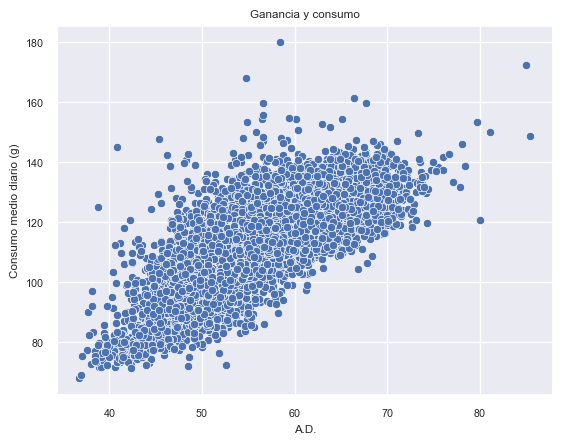

In [50]:
sns.scatterplot(
    data=consumo, 
    x='A.D.',
    y='Consumo medio diario (g)', 

   
    palette='Paired_r'
    )

plt.title('Ganancia y consumo')
plt.xlabel('A.D.')
plt.ylabel('Consumo medio diario (g)')


plt.show()

*Hay una evidente correlación entre la ganancia de peso y el consumo de alimento*

In [51]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [52]:
x=consumo['A.D.']
y=consumo['Consumo medio diario (g)']

In [53]:
import statsmodels.api as sm
from scipy import stats

In [54]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(x)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 107.44329391622853, p-value = 4.6664344254922294e-24


In [55]:
k2, p_value = stats.normaltest(y)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 1886.4944876601307, p-value = 0.0


In [56]:
print(pg.normality(x)) 

             W          pval  normal
A.D.  0.997176  2.019512e-16   False


C:\Users\ebover\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [57]:
print(pg.normality(y)) 

                                 W  pval  normal
Consumo medio diario (g)  0.952884   0.0   False


C:\Users\ebover\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


*En ninguno de los test se valida la distribución normal, sin embargo,los test estadísticos requieren que la población de la que procede la muestra tenga una distribución normal, no la muestra en sí. Si la muestra se distribuye de forma normal, se puede aceptar que así lo hace la población de origen. En el caso de que la muestra no se distribuya de forma normal pero se tenga certeza de que la población de origen sí lo hace, entonces, puede estar justificado aceptar los resultados obtenidos por los contrastes paramétricos como válidos.*

In [58]:
pg.corr(x, y)

,n,r,CI95%,p-val,BF10,power
pearson,15316,0.727808,"[0.72, 0.74]",0.0,inf,1.0


*se observa una correlación entre la ganancia y el consumo con un valor de r2 de 72.7%*

In [59]:
consumo_t=df[['Ulto. Levan.','Consumo medio diario (g)']]
consumo_t.head()


,Ulto. Levan.,Consumo medio diario (g)
0,2015-01-01,115.963592
1,2015-01-01,117.081839
2,2015-01-01,127.820226
3,2015-01-02,127.343729
4,2015-01-04,138.304026


In [60]:
consumo_t=consumo_t.groupby(['Ulto. Levan.']).mean()
consumo_t

,Consumo medio diario (g)
Ulto. Levan.,
2015-01-01,121.904603
2015-01-02,117.768723
2015-01-04,125.751458
2015-01-05,114.506981
2015-01-06,111.241199
...,...
2023-02-23,114.654874
2023-02-24,114.341357
2023-02-26,115.384629


<AxesSubplot:xlabel='Ulto. Levan.', ylabel='Consumo medio diario (g)'>

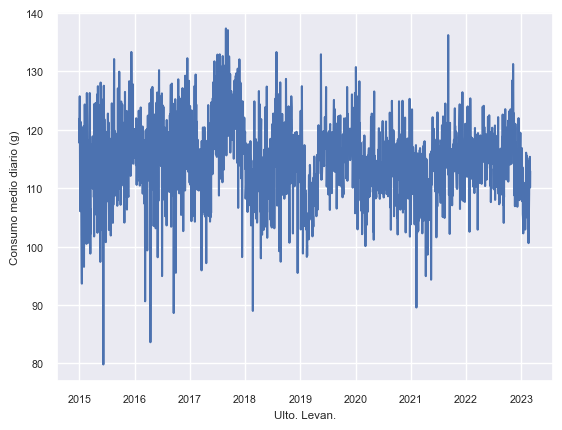

In [61]:
sns.lineplot(data=consumo_t, x='Ulto. Levan.', y='Consumo medio diario (g)')

*Al igual que el caso de la ganancia se observa una posible estacionalidad del consumo de alimento*

In [62]:
tipo_granja_3=df[['Ventilación forzada','Consumo medio diario (g)','Índice']] 
tipo_granja_3.head()

,Ventilación forzada,Consumo medio diario (g),Índice
0,S,115.963592,6
1,N,117.081839,7
2,N,127.820226,8
3,N,127.343729,15
4,N,138.304026,21


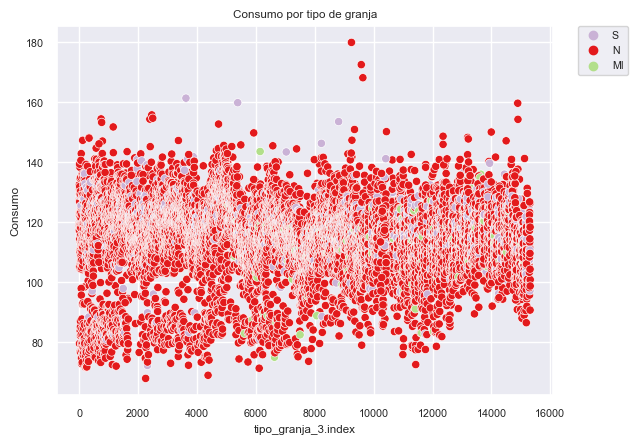

In [63]:
sns.scatterplot(
    data=tipo_granja_3, 
    x='Índice',
   y='Consumo medio diario (g)',
    hue='Ventilación forzada',
   
    palette='Paired_r'
    )

plt.title('Consumo por tipo de granja')
plt.xlabel('tipo_granja_3.index')
plt.ylabel('Consumo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

*Si bien la cantidad de granjas y en consecuencia crianzas que no tienen sistema de ventilación forzada es mucho mayor que las que sí tienen (S y MI) no se evidencia una diferencia marcada entre los sistemas como se espera.*

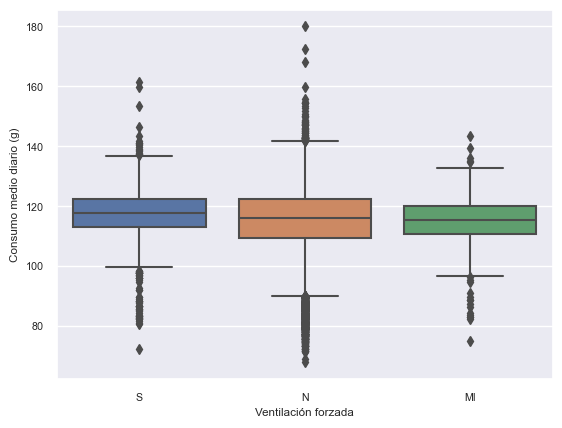

In [64]:
sns.set(font_scale = 0.7)
sns.boxplot( x=tipo_granja_3['Ventilación forzada'], y=tipo_granja_3['Consumo medio diario (g)']);
plt.show()

**Recomendaciones**

Las recomendaciones luego del análisis exploratorio realizado son seguir explorando en más detalle los mismos gráficos: Por ejemplo que ocurre dentro de cada localidad a lo largo del año. Y comparar años a nivel de día y agregar datos climáticos como temperatura y humedad ambiente. Debido a que hay una correlación entre la ganancia de peso y el consumo de alimento continuar analizando las posibles causas de detrimento del consumo.

In [65]:
#base para el modelo
dfm=df[['% a 7 Días','A.D.','P. Prom.','Consumo medio diario (g)','mes ingreso','Densidad','% desvío consumo std','Pes conv 2,7','mortandad semanal promedio','Edad','Días de receso corregido']]
dfm.head()

,% a 7 Días,A.D.,P. Prom.,Consumo medio diario (g),mes ingreso,Densidad,% desvío consumo std,"Pes conv 2,7",mortandad semanal promedio,Edad,Días de receso corregido
0,0.55,54.49,2.670175,115.963592,11,12.000000,-10.389276,1.262878,0.411429,49.0,14
1,0.83,50.63,2.679233,117.081839,11,10.454545,-14.867094,1.164476,0.755577,52.9,12
2,0.92,56.12,2.750870,127.820226,11,9.470000,-1.227077,1.194771,0.921429,49.0,11
3,1.35,56.12,2.745705,127.343729,11,10.000000,-1.595289,1.196094,0.842857,49.0,9
4,0.76,60.98,3.107525,138.304026,11,10.769231,3.530095,1.265246,1.008824,51.0,10


In [66]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

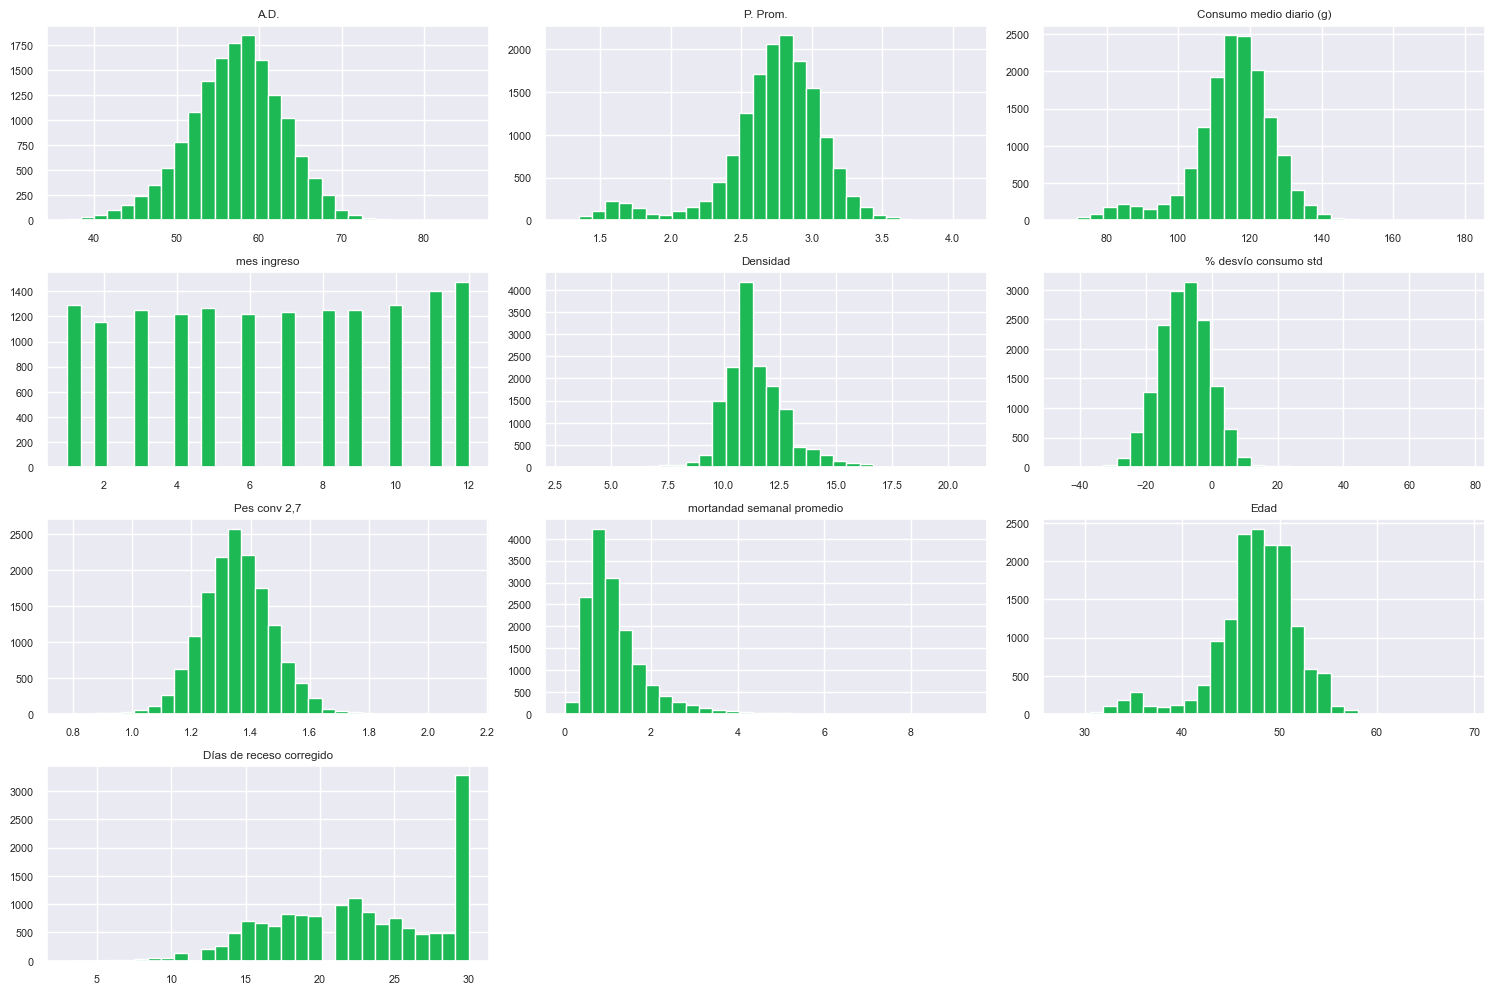

In [81]:
#Distribución de las variables incluidas en el modelo
dfm.iloc[:, 1:].hist(bins = 30, figsize = (15, 10), color = '#1DB954')
plt.tight_layout()
plt.show()

In [67]:
# Seleccionar las variables predictoras y la variable de destino
X = dfm.drop('A.D.', 1) 
y = dfm['A.D.']

C:\Users\ebover\AppData\Local\Temp\ipykernel_14284\2588397397.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = dfm.drop('A.D.', 1)


In [68]:
# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Crear el modelo de SVR
model = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [70]:
# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [72]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


In [73]:
# Calcular el error cuadrático medio (MSE) y el coeficiente de determinación (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [74]:
# Mostrar las métricas de evaluación de rendimiento
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

Error cuadrático medio (MSE): 6.336592788907401
Coeficiente de determinación (R²): 0.8114090567421031


*Del análisis surge que no todas las variables del dataframe son significativas para la determinación del valor de ganancia media diaria.La densidad y la mortalidad a los 7 días quedan excluídas.*

*Del análisis resulta que las dos variables que tienen mayor correlación con la ganancia media diaria de peso son el consumo de alimento y la relación peso/conversión, es decir la cantidad de peso logrado en relación con el alimento consumido.*

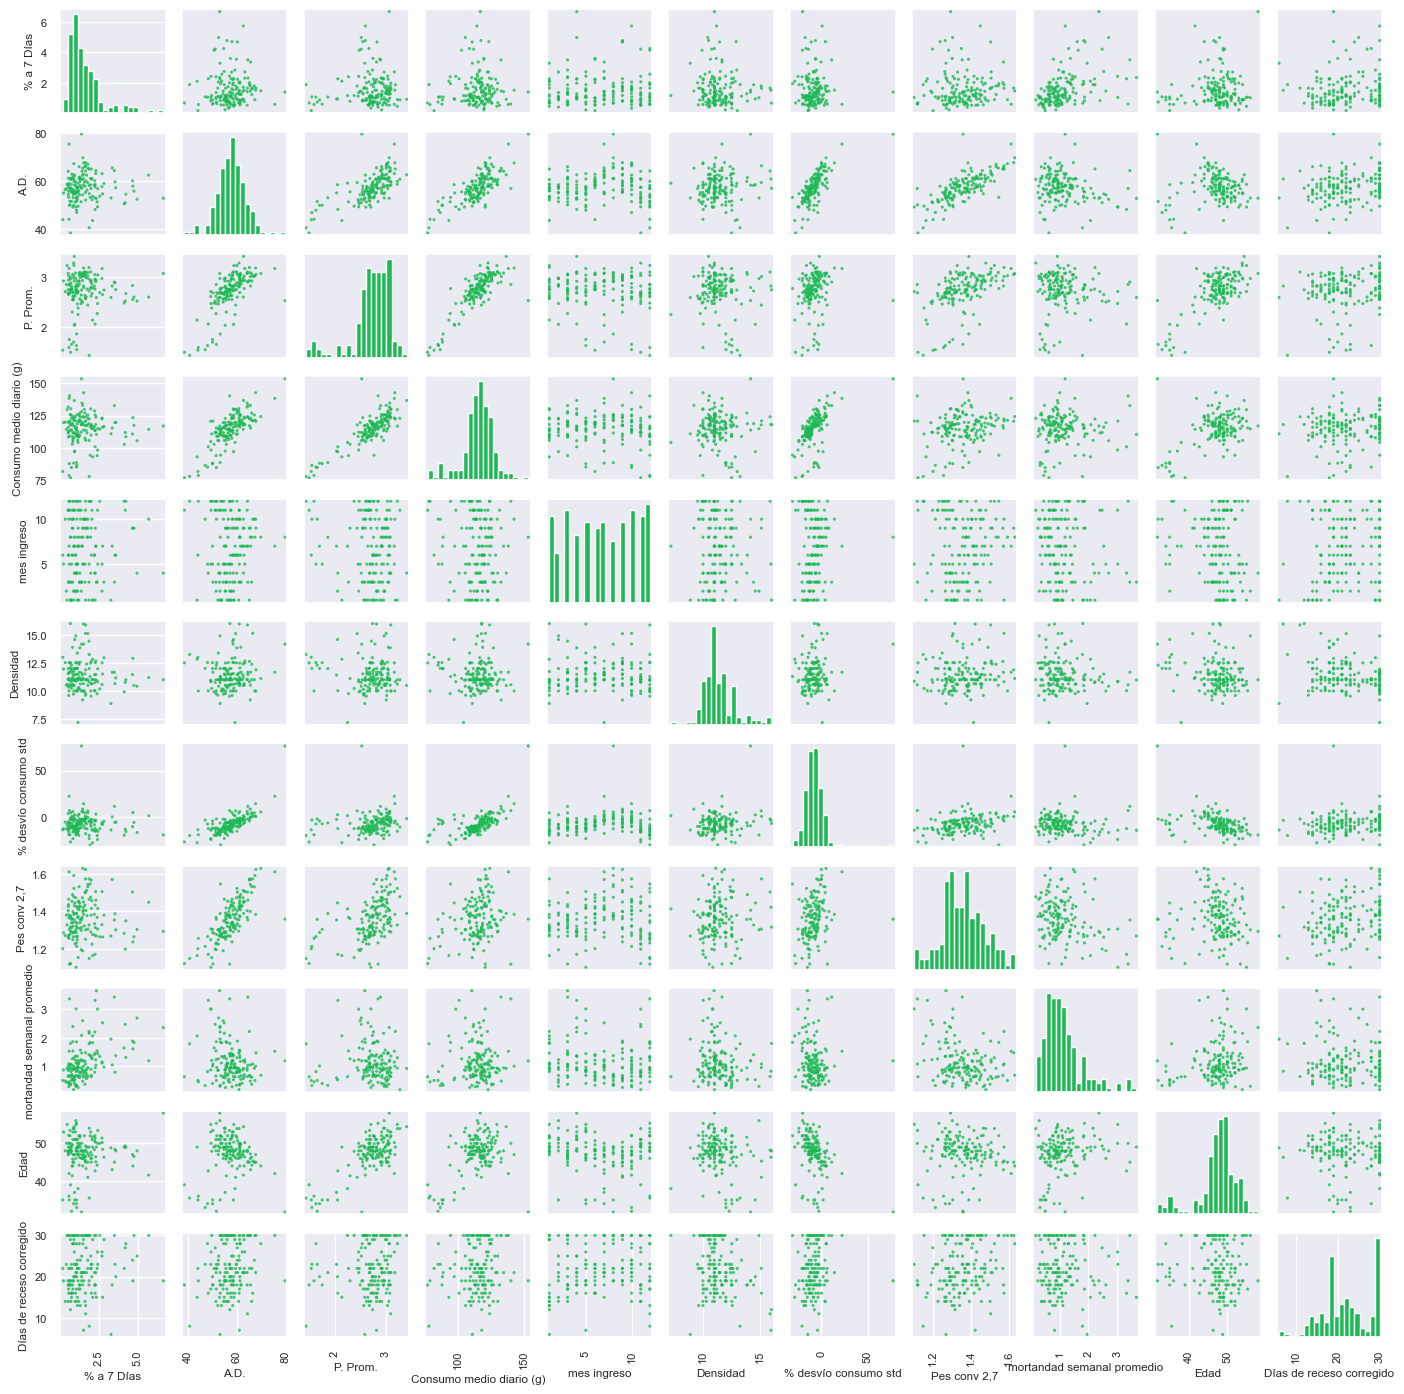

In [84]:


pd.plotting.scatter_matrix(dfm.iloc[::100,:], color = '#1DB954', figsize=(14,14), marker='.', hist_kwds={'color':['#1DB954'], 'bins': 20}, s=20, alpha =.8)
plt.tight_layout()
plt.show()

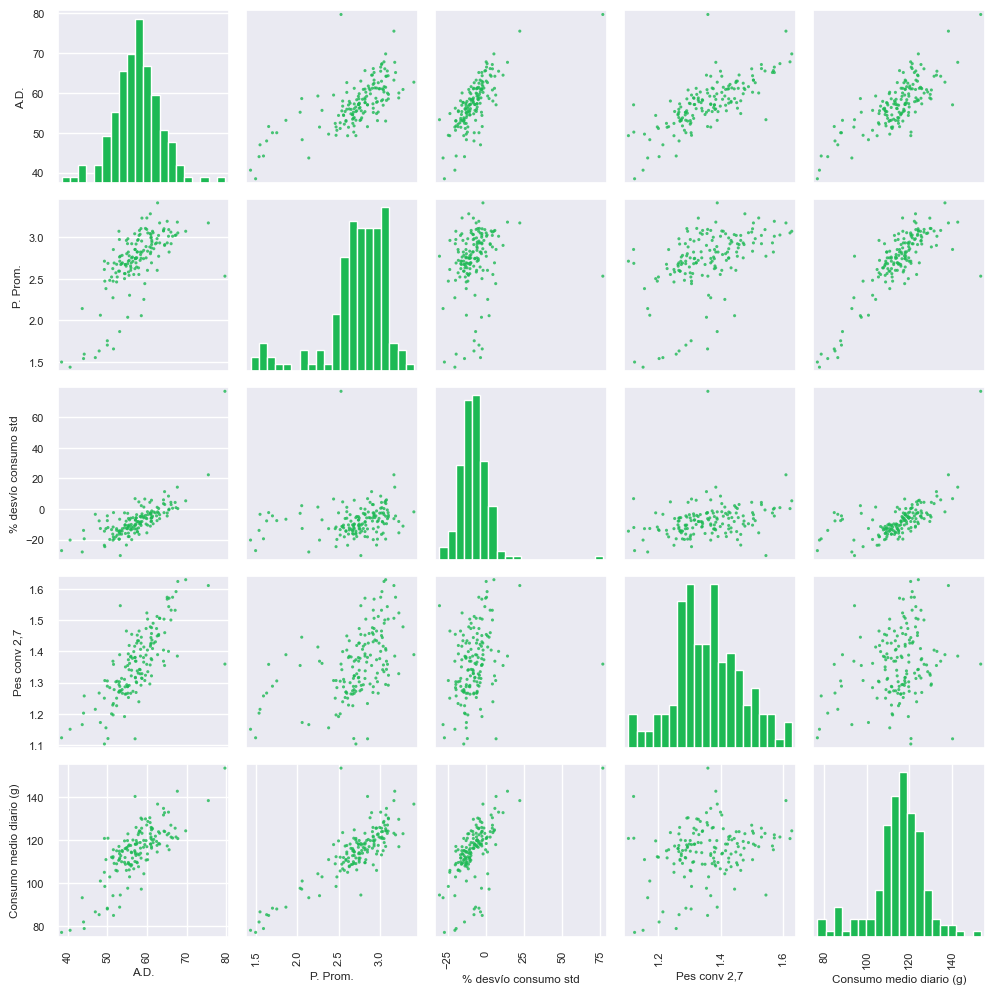

In [86]:
dfm2 = dfm[['A.D.', 'P. Prom.', '% desvío consumo std', 'Pes conv 2,7', 'Consumo medio diario (g)']]

pd.plotting.scatter_matrix(dfm2.iloc[::100,:], color = '#1DB954', figsize=(10,10), marker='.', hist_kwds={'color':['#1DB954'], 'bins': 20}, s=20, alpha =.8)
plt.tight_layout()
plt.show()

In [87]:
dfm2.corr().round(2)

,A.D.,P. Prom.,% desvío consumo std,"Pes conv 2,7",Consumo medio diario (g)
A.D.,1.00,0.78,0.75,0.83,0.73
P. Prom.,0.78,1.00,0.37,0.55,0.87
% desvío consumo std,0.75,0.37,1.00,0.38,0.64
"Pes conv 2,7",0.83,0.55,0.38,1.00,0.27
Consumo medio diario (g),0.73,0.87,0.64,0.27,1.00


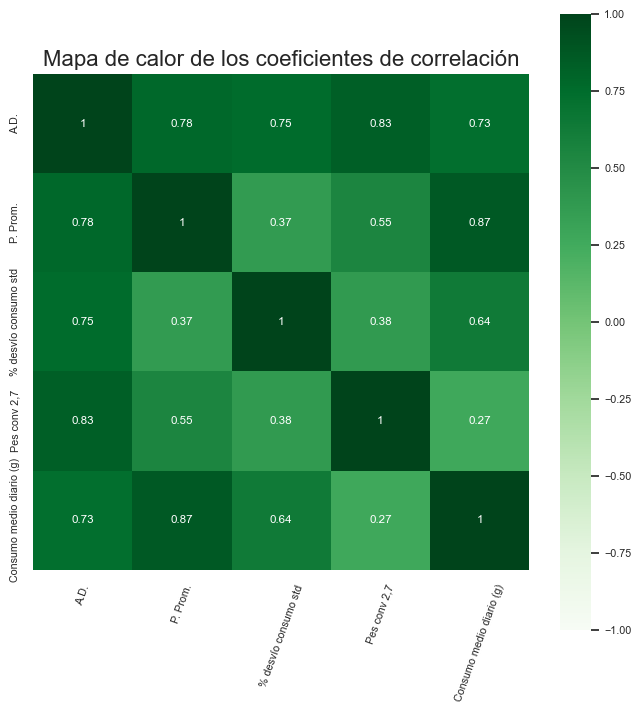

In [89]:
plt.figure(figsize = (8,8))
plt.axis('scaled')
sns.heatmap(dfm2.corr().round(2), vmin=-1, vmax=1, cmap = "Greens", cbar = True, annot=True)
plt.xticks(rotation = 70)
plt.title('Mapa de calor de los coeficientes de correlación', fontsize = 16)
plt.show()

**Datos climáticos zonales**

In [2]:
#Necesito poder acceder a datos climáticos de las zonas de producción para el análisis de mi proyecto.

import numpy as np

import pandas as pd
import json


In [3]:
import requests

response = requests.get('http://api.weatherstack.com/current', params={
    'access_key': 'a184c0e20b4f87bc2f5682ae1d97908d',
    'query': 'Concepción del Uruguay, Argentina'
    
})

data = response.json()
print(data)

{'request': {'type': 'City', 'query': 'Concepcion Del Uruguay, Argentina', 'language': 'en', 'unit': 'm'}, 'location': {'name': 'Concepcion Del Uruguay', 'country': 'Argentina', 'region': 'Entre Rios', 'lat': '-32.483', 'lon': '-58.228', 'timezone_id': 'America/Argentina/Cordoba', 'localtime': '2023-04-04 11:10', 'localtime_epoch': 1680606600, 'utc_offset': '-3.0'}, 'current': {'observation_time': '02:10 PM', 'temperature': 22, 'weather_code': 116, 'weather_icons': ['https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0002_sunny_intervals.png'], 'weather_descriptions': ['Partly cloudy'], 'wind_speed': 15, 'wind_degree': 131, 'wind_dir': 'SE', 'pressure': 1017, 'precip': 0, 'humidity': 67, 'cloudcover': 39, 'feelslike': 22, 'uv_index': 6, 'visibility': 10, 'is_day': 'yes'}}


In [5]:
!pip install requests


info = json.dumps(data)


df = json.loads(info)

df

jsondata=json.loads(info)
df2=pd.DataFrame.from_dict(jsondata)
df2

#La API que encontré solo da el valor instantáneo (del momento en que se ejecuta el código), no sé si es posible configurarlo para que se ejecute una vez al día a una hora determinada y vaya almacenando esa información.


,request,location,current
type,City,NaN,NaN
query,"Concepcion Del Uruguay, Argentina",NaN,NaN
language,en,NaN,NaN
unit,m,NaN,NaN
name,NaN,Concepcion Del Uruguay,NaN
country,NaN,Argentina,NaN
region,NaN,Entre Rios,NaN
lat,NaN,-32.483,NaN
lon,NaN,-58.228,NaN
timezone_id,NaN,America/Argentina/Cordoba,NaN


In [10]:
#Usé directamente meteostat en python para obtener datos históricos de clima
!pip install meteostat


In [11]:
# Importación de meteostat y otros relacionados
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

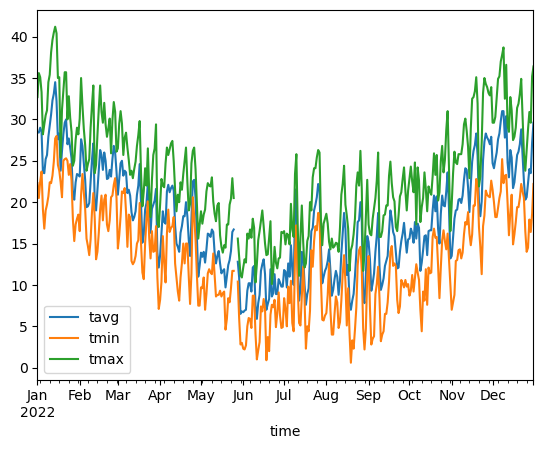

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2022-01-01,28.5,22.3,32.7,0.3,NaN,56.0,14.5,NaN,1003.8,NaN
2022-01-02,28.4,20.5,35.6,0.4,NaN,26.0,6.8,NaN,1004.8,NaN
2022-01-03,29.0,22.5,35.1,9.1,NaN,68.0,9.3,NaN,1006.5,NaN
2022-01-04,28.5,23.7,33.3,1.4,NaN,126.0,10.7,NaN,1004.6,NaN
2022-01-05,23.6,19.1,28.2,0.0,NaN,142.0,20.5,NaN,1012.5,NaN


In [12]:
# Definición del período
start = datetime(2022, 1, 1)
end = datetime(2022, 12, 31)

# Definir la ubicación mediante coordenadas
cdu = Point(-32.484474, -58.232199)

# Obtener los datos
clima = Daily(cdu, start, end)
clima = clima.fetch()

# Gráfico de líneas para la temperatura media, mínima y máxima
clima.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

clima.head()

In [13]:
#creo un subset con los datos que quiero evaluar
datos_cdu=clima[['tavg','tmin','tmax','prcp','wspd']]
datos_cdu.head()


,tavg,tmin,tmax,prcp,wspd
time,,,,,
2022-01-01,28.5,22.3,32.7,0.3,14.5
2022-01-02,28.4,20.5,35.6,0.4,6.8
2022-01-03,29.0,22.5,35.1,9.1,9.3
2022-01-04,28.5,23.7,33.3,1.4,10.7
2022-01-05,23.6,19.1,28.2,0.0,20.5


In [14]:
# Valor índice para el valor máximo de cada columna
# Valores en cada columna
maxValueIndex = datos_cdu.idxmax()
 

In [15]:
print("Los valores máximos de cada columna se corresponden con las siguientes fechas :")
print(maxValueIndex)
datos_cdu.max()

Los valores máximos de cada columna se corresponden con las siguientes fechas :
tavg   2022-01-14
tmin   2022-01-15
tmax   2022-01-14
prcp   2022-02-27
wspd   2022-05-17
dtype: datetime64[ns]


tavg    34.5
tmin    28.0
tmax    41.2
prcp    63.6
wspd    26.8
dtype: float64

In [16]:
# Encontrar el valor máximo
# valor en cada columna
minValueIndex = datos_cdu.idxmin()

In [ ]:
print("Los valores mínimos de cada columna se corresponden con las siguientes fechas :")
print(minValueIndex)


In [17]:
datos_cdu.min()

datos_cdu.resample('M').mean()

datos_cdu_mensuales=datos_cdu.resample('M').mean()

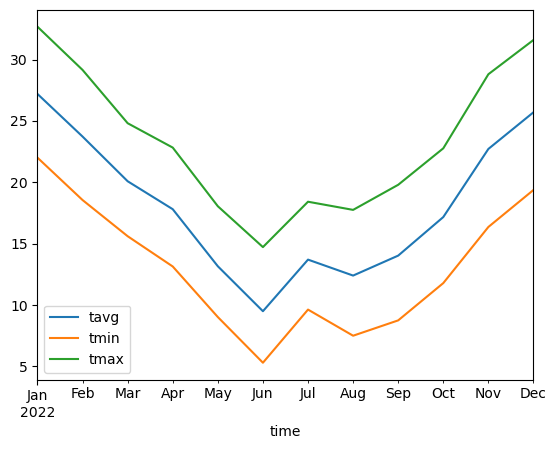

In [18]:
datos_cdu_mensuales.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [19]:
ppt=clima[['prcp']]
ppt.head()


,prcp
time,
2022-01-01,0.3
2022-01-02,0.4
2022-01-03,9.1
2022-01-04,1.4
2022-01-05,0.0


In [20]:
ppt_mensuales=ppt.resample('M').sum()
ppt_mensuales

,prcp
time,
2022-01-31,171.6
2022-02-28,160.0
2022-03-31,163.2
2022-04-30,117.3
2022-05-31,44.6
2022-06-30,16.0
2022-07-31,105.6
2022-08-31,54.7
2022-09-30,58.3


<AxesSubplot:xlabel='time'>

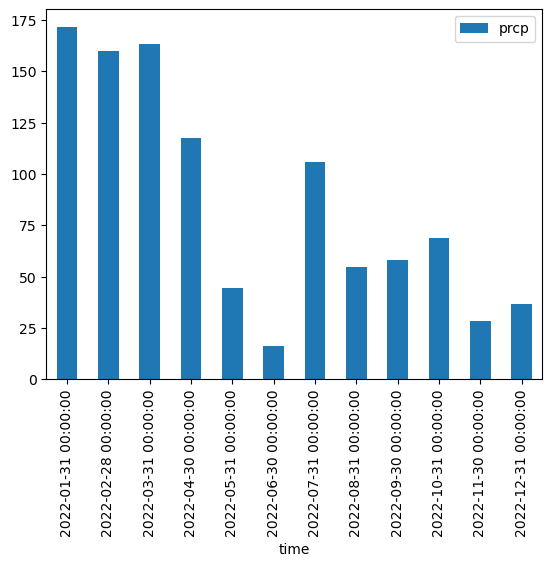

In [21]:
ppt_mensuales.plot(kind='bar')

In [22]:
BaseURL = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/'

ApiKey='2ADT4HU2J8JK7RMEAFGAVYDS3'
#Unidades para salida de datos - us o metric
UnitGroup='metric'

#Localización
Location='-32.468832926893455, -58.27398229401725'

#Fechas de inicio y salida opcionales
#Si no se especifica trae el prónostico. 
#If start date only is specified, a single historical or forecast day will be retrieved
#If both start and and end date are specified, a date range will be retrieved
StartDate = '2015-01-01'
EndDate='2023-03-15'

#JSON o CSV 
#JSON format supports daily, hourly, current conditions, weather alerts and events in a single JSON package
#CSV format requires an 'include' parameter below to indicate which table section is required
ContentType="csv"

#include sections
#values include days,hours,current,alerts
Include="days"


In [23]:
import csv
import codecs
import urllib.request
import urllib.error
import sys

In [25]:
#Query básica más ubicación
ApiQuery='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/-32.468832926893455,-58.27398229401725'

#append the start and end date if present
if (len(StartDate)):
    ApiQuery+="2015-01-01"+StartDate
    if (len(EndDate)):
        ApiQuery+="2023-03-15"+EndDate

#Url is completed. Now add query parameters (could be passed as GET or POST)
ApiQuery+="GET"

#append each parameter as necessary
if (len(UnitGroup)):
    ApiQuery+="metric"+UnitGroup

if (len(ContentType)):
    ApiQuery+="csv"+ContentType

if (len(Include)):
    ApiQuery+="include"+Include

ApiQuery+="2ADT4HU2J8JK7RMEAFGAVYDS3"+ApiKey


In [26]:
print(' - Running query URL: ', ApiQuery)
print()

 - Running query URL:  https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/-32.468832926893455,-58.273982294017252015-01-012015-01-012023-03-152023-03-15GETmetricmetriccsvcsvincludedays2ADT4HU2J8JK7RMEAFGAVYDS32ADT4HU2J8JK7RMEAFGAVYDS3



In [27]:
CSVBytes = urllib.request.urlopen(ApiQuery)

HTTPError: HTTP Error 401: 